In [ ]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

# **Load Data**

In [ ]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape)

11490434/11490434 [==============================] - 1s 0us/step
(60000, 28, 28) (60000,)


# **Preprocess the data**

In [ ]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

# convert class vectors to binary class matrices
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


# **Create the model**

In [ ]:
#  create CNN model
batch_size = 128
num_classes = 10
epochs = 10

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

# **Train the model**

In [ ]:
# model.fit() function of Keras will start the training of the model. It takes the training data, validation data, epochs, and batch size.
# used to train the model. After training, we save the weights and model definition in the ‘mnist.h5’ file.

hist = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
print("The model has successfully trained")
model.save('mnist.h5')
print("Saving the model as mnist.h5")

Epoch 1/10
469/469 [==============================] - 195s 414ms/step - loss: 2.2663 - accuracy: 0.1642 - val_loss: 2.2059 - val_accuracy: 0.4667
Epoch 2/10
469/469 [==============================] - 193s 411ms/step - loss: 2.1698 - accuracy: 0.3361 - val_loss: 2.0836 - val_accuracy: 0.6740
Epoch 3/10
469/469 [==============================] - 187s 399ms/step - loss: 2.0376 - accuracy: 0.4805 - val_loss: 1.9101 - val_accuracy: 0.7323
Epoch 4/10
469/469 [==============================] - 170s 363ms/step - loss: 1.8556 - accuracy: 0.5677 - val_loss: 1.6738 - val_accuracy: 0.7645
Epoch 5/10
469/469 [==============================] - 169s 361ms/step - loss: 1.6252 - accuracy: 0.6261 - val_loss: 1.3974 - val_accuracy: 0.7882
Epoch 6/10
469/469 [==============================] - 181s 386ms/step - loss: 1.3863 - accuracy: 0.6616 - val_loss: 1.1376 - val_accuracy: 0.8013
Epoch 7/10
469/469 [==============================] - 172s 368ms/step - loss: 1.1834 - accuracy: 0.6897 - val_loss: 0.9365 -

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# **Evaluate the model**

In [ ]:
#10,000 images in  dataset which will be used to evaluate how good model works.
#The testing data was not involved in the training of the data therefore, it is new data for our model. The MNIST dataset is well balanced

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.6275764107704163
Test accuracy: 0.8485999703407288


# **visualization of digits recognition test**

1/1 [==============================] - 0s 33ms/step


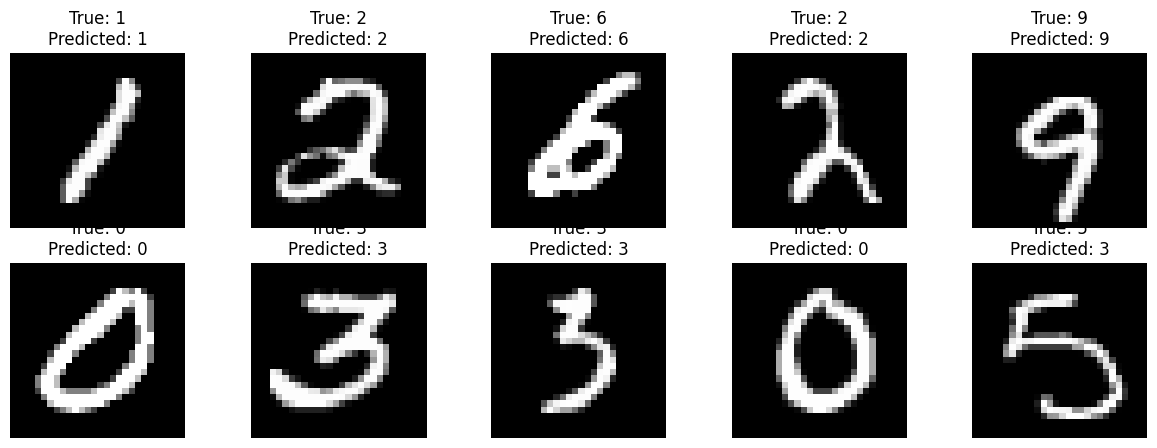

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Select random images from the test set
num_images_to_show = 10
random_indices = np.random.choice(x_test.shape[0], num_images_to_show)

# Get the predicted probabilities for each class
predicted_probabilities = model.predict(x_test[random_indices])

# Get the predicted labels by selecting the class with the highest probability
predicted_labels = np.argmax(predicted_probabilities, axis=1)

# Display the images along with their true and predicted labels
plt.figure(figsize=(15, 5))
for i, idx in enumerate(random_indices):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f'True: {np.argmax(y_test[idx])}\nPredicted: {predicted_labels[i]}')
    plt.axis('off')

plt.show()
